In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,MinMaxScaler, OneHotEncoder 
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import pickle

# Load the dataset
df = pd.read_csv('SongPopularity.csv')

# Display the first few rows of the dataset
df.head()

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,I Need You,I Need You,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,...,0.736,0.000096,0.118,-7.124,0.0367,144.705,0.564,7,1,4
1,Sweet Lady,Tyrese,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,...,0.522,0.000000,0.240,-6.254,0.0383,66.024,0.584,9,0,4
2,You Take My Breath Away - Mono Version,Sooner or Later,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,...,0.600,0.000026,0.523,-7.913,0.0357,141.912,0.272,11,1,4
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,...,0.059,0.000000,0.103,-16.131,0.0497,76.642,0.331,9,1,4
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,...,0.348,0.001280,0.247,-10.669,0.0545,143.595,0.385,7,0,4


Total number of features: 24
Number of categorical features: 3
Number of continuous features: 21


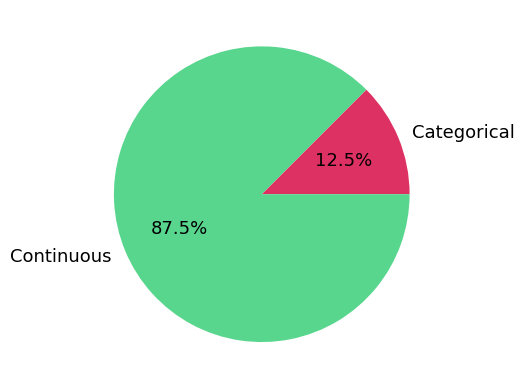

['Key', 'Mode', 'Time Signature']

In [16]:
cat_features = [col for col in df.columns if df[col].nunique() < 50]
cont_features = [col for col in df.columns if df[col].nunique() >= 50]

print(f'Total number of features: {len(cat_features) + len(cont_features)}')
print(f'\033[92mNumber of categorical features: {len(cat_features)}')
print(f'\033[96mNumber of continuous features: {len(cont_features)}')

plt.pie([len(cat_features), len(cont_features)], 
        labels=['Categorical', 'Continuous'],
        colors=['#DE3163', '#58D68D'],
        textprops={'fontsize': 13},
        autopct='%1.1f%%')
plt.show()
cat_features

In [17]:
# Split the data into train and test sets
X = df.drop(['Popularity'],axis=1)
y = df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train= X_train.reset_index(drop=True)
X_test= X_test.reset_index(drop=True)
y_train= y_train.reset_index(drop=True)
y_test= y_test.reset_index(drop=True)

In [18]:
# Preprocessing the data
def preprocess_data(df):
    # Drop unnecessary columns
    df.drop(['Song', 'Album', 'Album Release Date', 'Artist Names', 'Spotify Link', 'Song Image', 'Spotify URI'], axis=1, inplace=True)

    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    #Initialize OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)

    # Apply one-hot encoding to the categorical columns
    one_hot_encoded = encoder.fit_transform(df[categorical_columns])
    #Create a DataFrame with the one-hot encoded columns
    #We use get_feature_names_out() to get the column names for the encoded data
    
    with open('encoder.pkl', 'wb') as f:
        pickle.dump(encoder, f)
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

    # Concatenate the one-hot encoded dataframe with the original dataframe
    df_encoded = pd.concat([df, one_hot_df], axis=1)

    # Drop the original categorical columns
    df_encoded = df_encoded.drop(categorical_columns, axis=1)
    df_encoded=df_encoded.dropna()
    return df_encoded

# Preprocess the data
X_train = preprocess_data(X_train)

# Display the first few rows of the preprocessed data
X_train

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,...,Artist(s) Genres_['west coast rap'],"Artist(s) Genres_['western swing', 'bluegrass gospel', 'country boogie', 'yodeling', 'country gospel']","Artist(s) Genres_['western swing', 'cowboy western']","Artist(s) Genres_['wrestling', 'rap', 'new orleans rap', 'trap', 'pop rap', 'hip hop']","Artist(s) Genres_['yacht rock', 'quiet storm', 'soft rock', 'mellow gold']","Artist(s) Genres_['yacht rock', 'soft rock', 'mellow gold', 'singer-songwriter', 'classic rock']",Artist(s) Genres_['yacht rock'],Artist(s) Genres_['yodeling'],Artist(s) Genres_['zither'],Artist(s) Genres_[]
0,1990,5,316813,0.00379,0.737,0.880,0.003510,0.4170,-6.449,0.0433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012,100,230253,0.01430,0.585,0.972,0.000000,0.0707,-4.450,0.0534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009,40,249533,0.01610,0.680,0.687,0.000000,0.2610,-6.162,0.0709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1987,59,247360,0.00462,0.787,0.889,0.423000,0.0665,-3.786,0.0397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1963,92,134066,0.20500,0.401,0.913,0.000459,0.1400,-2.755,0.1700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,2016,22,202746,0.11700,0.584,0.700,0.000000,0.0939,-4.275,0.0456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4948,1986,99,229880,0.06200,0.515,0.277,0.000000,0.2580,-17.850,0.0255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4949,1954,26,149466,0.20600,0.662,0.794,0.000000,0.1490,-6.942,0.1520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4950,2015,8,185142,0.24700,0.821,0.759,0.000000,0.3210,-8.541,0.1210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Feature Scaling
def feature_scaling(df):
    
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    df = df_scaled
    
    return df

# Apply feature scaling to the preprocessed data
X_train = feature_scaling(X_train)

# Display the first few rows of the scaled data
X_train

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,...,Artist(s) Genres_['west coast rap'],"Artist(s) Genres_['western swing', 'bluegrass gospel', 'country boogie', 'yodeling', 'country gospel']","Artist(s) Genres_['western swing', 'cowboy western']","Artist(s) Genres_['wrestling', 'rap', 'new orleans rap', 'trap', 'pop rap', 'hip hop']","Artist(s) Genres_['yacht rock', 'quiet storm', 'soft rock', 'mellow gold']","Artist(s) Genres_['yacht rock', 'soft rock', 'mellow gold', 'singer-songwriter', 'classic rock']",Artist(s) Genres_['yacht rock'],Artist(s) Genres_['yodeling'],Artist(s) Genres_['zither'],Artist(s) Genres_[]
0,0.095664,-1.491982,1.392290,-1.013114,0.750543,1.372886,-0.247377,1.597288,0.595154,-0.362736,...,-0.014212,-0.020101,-0.014212,-0.014212,-0.014212,-0.020101,-0.047183,-0.020101,-0.014212,-0.259309
1,1.187319,1.757590,0.069130,-0.976741,-0.223718,1.822034,-0.268343,-0.727594,1.120125,-0.236365,...,-0.014212,-0.020101,-0.014212,-0.014212,-0.014212,-0.020101,-0.047183,-0.020101,-0.014212,-0.259309
2,1.038457,-0.294771,0.363845,-0.970511,0.385195,0.430652,-0.268343,0.549983,0.670525,-0.017404,...,-0.014212,-0.020101,-0.014212,-0.014212,-0.014212,-0.020101,-0.047183,-0.020101,-0.014212,-0.259309
3,-0.053198,0.355143,0.330628,-1.010242,1.071024,1.416824,2.258369,-0.755791,1.294502,-0.407780,...,-0.014212,-0.020101,-0.014212,-0.014212,-0.014212,-0.020101,-0.047183,-0.020101,-0.014212,-0.259309
4,-1.244094,1.483942,-1.401188,-0.316754,-1.403086,1.533993,-0.265601,-0.262349,1.565259,1.222540,...,-0.014212,-0.020101,-0.014212,-0.014212,-0.014212,-0.020101,-0.047183,-0.020101,-0.014212,-0.259309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,1.385802,-0.910480,-0.351343,-0.621310,-0.230127,0.494118,-0.268343,-0.571841,1.166083,-0.333959,...,-0.014212,-0.020101,-0.014212,-0.014212,-0.014212,-0.020101,-0.047183,-0.020101,-0.014212,-0.259309
4948,-0.102819,1.723384,0.063428,-0.811657,-0.672391,-1.570985,-0.268343,0.529843,-2.398935,-0.585451,...,-0.014212,-0.020101,-0.014212,-0.014212,-0.014212,-0.020101,-0.047183,-0.020101,-0.014212,-0.259309
4949,-1.690681,-0.773656,-1.165783,-0.313293,0.269822,0.953030,-0.268343,-0.201928,0.465685,0.997323,...,-0.014212,-0.020101,-0.014212,-0.014212,-0.014212,-0.020101,-0.047183,-0.020101,-0.014212,-0.259309
4950,1.336181,-1.389364,-0.620439,-0.171397,1.288951,0.782159,-0.268343,0.952793,0.045761,0.609450,...,-0.014212,-0.020101,-0.014212,-0.014212,-0.014212,-0.020101,-0.047183,-0.020101,-0.014212,-0.259309


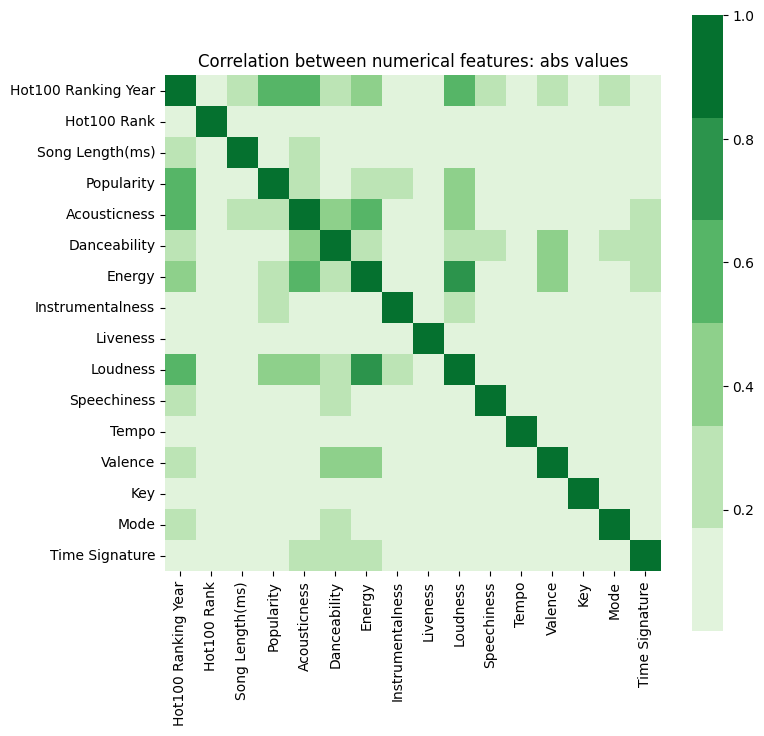

In [20]:
numeric_columns = df.columns[df.dtypes != 'object']
numeric_df = pd.DataFrame(data=df, columns=numeric_columns, index=df.index)

corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("Greens")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

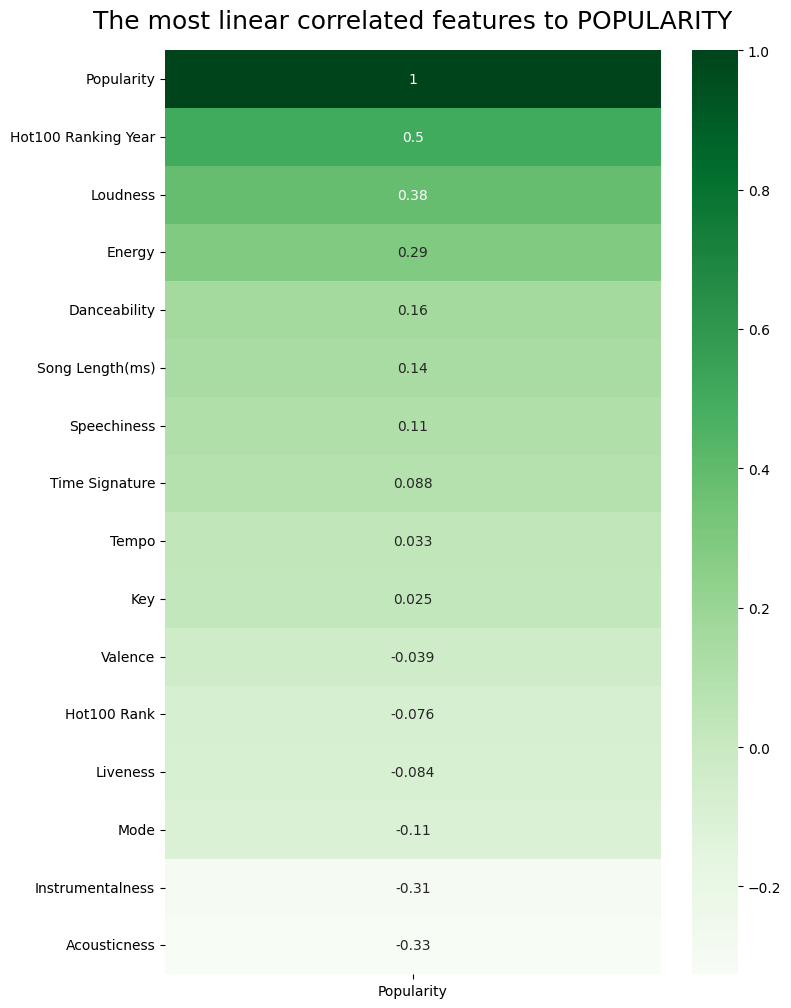

In [21]:
corr = numeric_df.corr()[['Popularity']].sort_values(by='Popularity', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr, annot=True, cmap='Greens')
heatmap.set_title('The most linear correlated features to POPULARITY', fontdict={'fontsize':18}, pad=16);

In [22]:
# Define the number of features to select
k = 20
# Perform feature selection using SelectKBest with f_regression
def select_features(df, k):
    
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(df, y_train)
    selected_features = df.columns[selector.get_support()]
    
    return selected_features

# Apply feature selection to the scaled data
selected_features = select_features(X_train, k)

# Display the selected features
print(selected_features)

Index(['Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Mode', 'Time Signature',
       'Artist(s) Genres_["man's orchestra"]',
       'Artist(s) Genres_['adult standards', 'easy listening']',
       'Artist(s) Genres_['deep adult standards']',
       'Artist(s) Genres_['karaoke']', 'Artist(s) Genres_['pop', 'dance pop']',
       'Artist(s) Genres_['pop']',
       'Artist(s) Genres_['swing', 'vaudeville', 'deep adult standards', 'british dance band']',
       'Artist(s) Genres_[]'],
      dtype='object')


In [23]:
# Preprocessing the data
def preprocess_data_test(d):
    # Drop unnecessary columns
    d.drop(['Song', 'Album', 'Album Release Date', 'Artist Names', 'Spotify Link', 'Song Image', 'Spotify URI'], axis=1, inplace=True)
    
    categorical_columns = d.select_dtypes(include=['object']).columns.tolist()
    with open('encoder.pkl', 'rb') as f:
            encoder = pickle.load(f)
    
    # Apply one-hot encoding to the categorical columns
    one_hot_encoded = encoder.fit_transform(d[categorical_columns])
    #Create a DataFrame with the one-hot encoded columns
    #We use get_feature_names_out() to get the column names for the encoded data
    
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

    # Concatenate the one-hot encoded dataframe with the original dataframe
    df_encoded = pd.concat([d, one_hot_df], axis=1)

    # Drop the original categorical columns
    df_encoded = df_encoded.drop(categorical_columns, axis=1)

    return df_encoded

# Preprocess the test data
X_test = preprocess_data_test(X_test)

# Ensure that the columns in the test data align with those in the training data
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_test

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,...,Artist(s) Genres_['west coast rap'],"Artist(s) Genres_['western swing', 'bluegrass gospel', 'country boogie', 'yodeling', 'country gospel']","Artist(s) Genres_['western swing', 'cowboy western']","Artist(s) Genres_['wrestling', 'rap', 'new orleans rap', 'trap', 'pop rap', 'hip hop']","Artist(s) Genres_['yacht rock', 'quiet storm', 'soft rock', 'mellow gold']","Artist(s) Genres_['yacht rock', 'soft rock', 'mellow gold', 'singer-songwriter', 'classic rock']",Artist(s) Genres_['yacht rock'],Artist(s) Genres_['yodeling'],Artist(s) Genres_['zither'],Artist(s) Genres_[]
0,1979,31,346133,0.415000,0.863,0.726,0.029900,0.0735,-6.649,0.0494,...,0,0,0,0,0,0.0,0.0,0,0,0.0
1,1987,4,291293,0.207000,0.709,0.824,0.000307,0.0888,-8.824,0.0453,...,0,0,0,0,0,0.0,0.0,0,0,0.0
2,2006,65,207586,0.025900,0.792,0.589,0.000128,0.1140,-6.869,0.2620,...,0,0,0,0,0,0.0,0.0,0,0,0.0
3,1982,76,308200,0.138000,0.667,0.363,0.000007,0.4100,-13.498,0.0275,...,0,0,0,0,0,0.0,0.0,0,0,0.0
4,1969,98,147760,0.195000,0.749,0.530,0.000035,0.0748,-12.940,0.0326,...,0,0,0,0,0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,1983,64,225840,0.102000,0.746,0.895,0.000242,0.0594,-5.381,0.0658,...,0,0,0,0,0,0.0,0.0,0,0,0.0
1235,2010,80,249546,0.043000,0.592,0.944,0.000000,0.3650,-2.940,0.1110,...,0,0,0,0,0,0.0,0.0,0,0,0.0
1236,1963,37,127093,0.946000,0.176,0.204,0.000000,0.1650,-11.643,0.0294,...,0,0,0,0,0,0.0,0.0,0,0,0.0
1237,2001,12,227600,0.056100,0.853,0.606,0.000000,0.3130,-4.596,0.0713,...,0,0,0,0,0,0.0,0.0,0,0,0.0


In [24]:
def feature_scaling_test(df):
    
    with open('scaler.pkl', 'rb') as f:
        scal = pickle.load(f)
    scaled_features = scal.fit_transform(df)
    df_scaled = pd.DataFrame(scaled_features, columns=df.columns)   
    df = df_scaled
    
    return df

# Apply feature scaling to the preprocessed data
X_test = feature_scaling_test(X_test)

# Display the first few rows of the scaled data
X_test

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,...,Artist(s) Genres_['west coast rap'],"Artist(s) Genres_['western swing', 'bluegrass gospel', 'country boogie', 'yodeling', 'country gospel']","Artist(s) Genres_['western swing', 'cowboy western']","Artist(s) Genres_['wrestling', 'rap', 'new orleans rap', 'trap', 'pop rap', 'hip hop']","Artist(s) Genres_['yacht rock', 'quiet storm', 'soft rock', 'mellow gold']","Artist(s) Genres_['yacht rock', 'soft rock', 'mellow gold', 'singer-songwriter', 'classic rock']",Artist(s) Genres_['yacht rock'],Artist(s) Genres_['yodeling'],Artist(s) Genres_['zither'],Artist(s) Genres_[]
0,-0.376727,-0.557394,2.108817,0.336892,1.592554,0.657997,-0.111148,-0.740399,0.572776,-0.282829,...,0.0,0.0,0.0,0.0,0.0,-0.04021,-0.063654,0.0,0.0,-0.26622
1,0.002217,-1.490187,1.190390,-0.358323,0.627204,1.129558,-0.272690,-0.640992,-0.024980,-0.336442,...,0.0,0.0,0.0,0.0,0.0,-0.04021,-0.063654,0.0,0.0,-0.26622
2,0.902210,0.617233,-0.211485,-0.963627,1.147490,-0.001227,-0.273667,-0.477262,0.512313,2.497220,...,0.0,0.0,0.0,0.0,0.0,-0.04021,-0.063654,0.0,0.0,-0.26622
3,-0.234623,0.997259,1.473538,-0.588947,0.363927,-1.088706,-0.274327,1.445908,-1.309537,-0.569203,...,0.0,0.0,0.0,0.0,0.0,-0.04021,-0.063654,0.0,0.0,-0.26622
4,-0.850407,1.757312,-1.213415,-0.398431,0.877945,-0.285127,-0.274173,-0.731952,-1.156182,-0.502513,...,0.0,0.0,0.0,0.0,0.0,-0.04021,-0.063654,0.0,0.0,-0.26622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,-0.187255,0.582685,0.094222,-0.709272,0.859139,1.471200,-0.273045,-0.832009,0.921261,-0.068375,...,0.0,0.0,0.0,0.0,0.0,-0.04021,-0.063654,0.0,0.0,-0.26622
1235,1.091682,1.135451,0.491236,-0.906473,-0.106210,1.706981,-0.274366,1.153534,1.592122,0.522679,...,0.0,0.0,0.0,0.0,0.0,-0.04021,-0.063654,0.0,0.0,-0.26622
1236,-1.134615,-0.350107,-1.559533,2.111696,-2.713907,-1.853791,-0.274366,-0.145905,-0.799727,-0.544357,...,0.0,0.0,0.0,0.0,0.0,-0.04021,-0.063654,0.0,0.0,-0.26622
1237,0.665370,-1.213804,0.123698,-0.862688,1.529869,0.080574,-0.274366,0.815680,1.137003,0.003545,...,0.0,0.0,0.0,0.0,0.0,-0.04021,-0.063654,0.0,0.0,-0.26622


In [25]:
X_train = X_train[selected_features]
X_test=X_test[selected_features]


In [26]:
# Training the Regression Models

# Initialize and train the Linear Regression
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("MSE:",mse)
print("r2_score:", r2_score(y_test, y_pred))

MSE: 227.00339372523914
r2_score: 0.5197840866358902


In [27]:
# Save the trained Linear Regression model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [28]:
# Training another regression model
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate the Mean Squared Error for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("MSE:",mse_rf)
print("r2_score:", r2_score(y_test, y_pred_rf))

MSE: 220.67452978208232
r2_score: 0.5331725260294389


In [29]:
# Hyperparameter tuning for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
best_params_rf


KeyboardInterrupt



In [30]:
best_params_rf ={'max_depth': 7 ,
'min_samples_leaf': 4,
'min_samples_split': 10,
'n_estimators': 300}
# Calculate the score with the new parameters for RandomForestRegressor
rf_regressor = RandomForestRegressor(**best_params_rf)
rf_regressor.fit(X_train, y_train)

# Calculate the score
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("MSE:",mse_rf)
print("r2_score:", rf_regressor.score(X_test, y_test))

MSE: 220.67452978208232
r2_score: 0.5549548028849308


In [31]:
with open('random_forest_regressor_model.pkl', 'wb') as f:
    pickle.dump(rf_regressor, f)